***
# Model Building for Deployment
***

In [4]:
#!pip freeze > requirements.txt

In [21]:
import pandas as pd
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz

In [22]:
pd.set_option("display.max_rows", None)

In [23]:
df = pd.read_csv('df.csv', index_col=[0])
df

,Gender,Age,MaritalStatus,EmploymentStatus,LoanAmount,Tenure,MerchantServiceCharge,ExpectedRevenue,LoanDuration,MonthlyRepaymentAmount,AmountReceived,InterestRate,CurrentOutstandingBalance,DefaultCharge,ItemsPurchased,Target,InflationScore,Primelending,Maxlending
0,M,36.1,M,E,52000,5,1040.0,6240.00,151,1.164800e+04,5.824000e+04,0.000,0.000000e+00,0.000000,others,1.0,14.34,11.68,27.58
1,F,36.1,U,SE,600000,5,2000.0,72000.00,151,1.344000e+05,6.720000e+05,0.000,0.000000e+00,0.000000,others,1.0,14.34,11.68,27.58
2,M,36.1,U,U,443000,6,2000.0,64045.14,182,8.450752e+04,5.115451e+05,0.000,0.000000e+00,4225.376167,others,1.0,14.34,11.68,27.58
3,U,36.1,U,U,21500,5,430.0,2647.41,214,4.829482e+03,2.416793e+04,0.000,0.000000e+00,0.000000,others,1.0,14.46,11.96,27.37
4,U,36.1,U,U,750000,4,2000.0,76470.00,120,2.066175e+05,8.264700e+05,0.000,0.000000e+00,0.000000,others,1.0,13.88,11.68,27.65
5,M,36.1,S,E,800000,6,2000.0,115657.13,181,1.526095e+05,9.156571e+05,0.000,0.000000e+00,7630.476083,electronics,1.0,13.88,11.68,27.65
6,U,36.1,U,U,940000,4,2000.0,95842.57,120,2.589606e+05,1.035843e+06,0.000,0.000000e+00,0.000000,others,1.0,13.88,11.68,27.65
7,U,36.1,U,U,3000000,2,2000.0,158402.95,59,1.579201e+06,3.158403e+06,0.000,0.000000e+00,0.000000,others,1.0,13.88,11.68,27.65
8,M,27.0,M,E,168000,4,2000.0,7000.00,29,4.375000e+04,1.750000e+05,0.000,0.000000e+00,0.000000,phone,1.0,13.88,11.68,27.65
9,U,36.1,U,U,315000,4,2000.0,32117.46,120,8.677937e+04,3.471175e+05,0.000,0.000000e+00,0.000000,computers,1.0,13.88,11.68,27.65


In [24]:
df.columns

Index(['Gender', 'Age', 'MaritalStatus', 'EmploymentStatus', 'LoanAmount',
       'Tenure', 'MerchantServiceCharge', 'ExpectedRevenue', 'LoanDuration',
       'MonthlyRepaymentAmount', 'AmountReceived', 'InterestRate',
       'CurrentOutstandingBalance', 'DefaultCharge', 'ItemsPurchased',
       'Target', 'InflationScore', 'Primelending', 'Maxlending'],
      dtype='object')

In [25]:
dfm = pd.read_csv("cust.csv", index_col=[0])
dfm

,Name,E-mail,Phone Number,GENDER,DOB,AGE,MARITAL STATUS,EMPLOYMENT STATUS,LGA,Account Number,...,Default Charge,Default Charge.1,Total Outstanding + Default Charge,Interest on Date Adjustment,Loan Age (Days),Current/Expired,Classification,Items purchased,Comment,Target
0,Similoluwa Bolaniran,similoluwa.bolaniran@gmail.com,8027644362,M,NaN,36.1,M,E,Unknown,1.000001e+09,...,0.000000,0.000000,0.000000e+00,0,0.000000,2023-03-02 14:19:05.376,Cleared,Others,NaN,1.0
1,Anuoluwapo Amusa,anu.awodiya@gmail.com,8122239291,F,NaN,36.1,U,SE,Unknown,1.000001e+09,...,0.000000,0.000000,0.000000e+00,0,0.000000,2023-03-02 14:19:05.376,Cleared,PS 5,NaN,1.0
2,Olanrewaju Idris,lanrewaju86@gmail.com,8074292521,M,NaN,36.1,U,U,Unknown,1.000001e+09,...,4225.376167,0.000000,2.746238e+02,0,0.000000,2023-03-02 14:19:05.376,Cleared,Others,NaN,1.0
3,Damilola Fene-Osakwe,dami.adeleye@gmail.com,8032000316,U,NaN,36.1,U,U,Unknown,1.000001e+09,...,0.000000,0.000000,0.000000e+00,0,0.000000,2023-03-02 14:19:05.376,Cleared,Others,NaN,1.0
4,Damilola Owolabi,dami.owolabi@gmail.com,8022562144,U,NaN,36.1,U,U,Unknown,1.000001e+09,...,0.000000,0.000000,0.000000e+00,0,0.000000,2023-03-02 14:19:05.376,Cleared,Others,NaN,1.0
5,Kaobolobari Benakole,kb@k16e.co,8145390539,M,NaN,36.1,S,E,Unknown,1.000001e+09,...,7630.476083,0.000000,-7.630476e+03,0,415.596594,2023-03-02 14:19:05.376,Cleared,Google Chromecast,NaN,1.0
6,Olufunso Olunaike,olufunso@useapace.com,8023889065,U,NaN,36.1,U,U,Unknown,1.000001e+09,...,0.000000,0.000000,0.000000e+00,0,0.000000,2023-03-02 14:19:05.376,Cleared,Others,NaN,1.0
7,Western Scientific Limited,-,7065793276,U,NaN,36.1,U,U,Unknown,1.000001e+09,...,0.000000,0.000000,0.000000e+00,0,0.000000,2023-03-02 14:19:05.376,Cleared,Others,NaN,1.0
8,Muyideen Olamide Pelumi,Muyideenolamide51@gmail.com,9024253585,M,1996-05-05 00:00:00,27.0,M,E,Alimosho,1.000001e+09,...,0.000000,0.000000,0.000000e+00,0,0.000000,2023-03-02 14:19:05.376,Cleared,Iphone XR,NaN,1.0
9,Olufunso Olunaike,olufunso@useapace.com,8023889065,U,NaN,36.1,U,U,Unknown,1.000001e+09,...,0.000000,0.000000,0.000000e+00,0,0.000000,2023-03-02 14:19:05.376,Cleared,Laptop,NaN,1.0


In [26]:
dfm.Classification.value_counts()

Pass & Watch    108
Cleared         104
Performing       43
Substandard      24
Doubtful          2
Lost              1
Name: Classification, dtype: int64

In [27]:
df["ItemsPurchased"].unique()

array(['others', 'electronics', 'phone', 'computers', 'appliances',
       'furniture', 'machine', 'service', 'materials'], dtype=object)

In [28]:
dfs = df.copy()
cat_col = dfs.select_dtypes("object").columns.tolist()
for col in dfs.columns:
    if col in cat_col:
        dfs[col] = pd.factorize(dfs[col])[0]

In [29]:
dfs["Target"] = dfm.Classification
dfs

,Gender,Age,MaritalStatus,EmploymentStatus,LoanAmount,Tenure,MerchantServiceCharge,ExpectedRevenue,LoanDuration,MonthlyRepaymentAmount,AmountReceived,InterestRate,CurrentOutstandingBalance,DefaultCharge,ItemsPurchased,Target,InflationScore,Primelending,Maxlending
0,0,36.1,0,0,52000,5,1040.0,6240.00,151,1.164800e+04,5.824000e+04,0.000,0.000000e+00,0.000000,0,Cleared,14.34,11.68,27.58
1,1,36.1,1,1,600000,5,2000.0,72000.00,151,1.344000e+05,6.720000e+05,0.000,0.000000e+00,0.000000,0,Cleared,14.34,11.68,27.58
2,0,36.1,1,2,443000,6,2000.0,64045.14,182,8.450752e+04,5.115451e+05,0.000,0.000000e+00,4225.376167,0,Cleared,14.34,11.68,27.58
3,2,36.1,1,2,21500,5,430.0,2647.41,214,4.829482e+03,2.416793e+04,0.000,0.000000e+00,0.000000,0,Cleared,14.46,11.96,27.37
4,2,36.1,1,2,750000,4,2000.0,76470.00,120,2.066175e+05,8.264700e+05,0.000,0.000000e+00,0.000000,0,Cleared,13.88,11.68,27.65
5,0,36.1,2,0,800000,6,2000.0,115657.13,181,1.526095e+05,9.156571e+05,0.000,0.000000e+00,7630.476083,1,Cleared,13.88,11.68,27.65
6,2,36.1,1,2,940000,4,2000.0,95842.57,120,2.589606e+05,1.035843e+06,0.000,0.000000e+00,0.000000,0,Cleared,13.88,11.68,27.65
7,2,36.1,1,2,3000000,2,2000.0,158402.95,59,1.579201e+06,3.158403e+06,0.000,0.000000e+00,0.000000,0,Cleared,13.88,11.68,27.65
8,0,27.0,0,0,168000,4,2000.0,7000.00,29,4.375000e+04,1.750000e+05,0.000,0.000000e+00,0.000000,2,Cleared,13.88,11.68,27.65
9,2,36.1,1,2,315000,4,2000.0,32117.46,120,8.677937e+04,3.471175e+05,0.000,0.000000e+00,0.000000,3,Cleared,13.88,11.68,27.65


In [32]:
dfs.Target = dfm.Target

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfs["Target"] = le.fit_transform(dfs["Target"])

In [33]:
dfs

,Gender,Age,MaritalStatus,EmploymentStatus,LoanAmount,Tenure,MerchantServiceCharge,ExpectedRevenue,LoanDuration,MonthlyRepaymentAmount,AmountReceived,InterestRate,CurrentOutstandingBalance,DefaultCharge,ItemsPurchased,Target,InflationScore,Primelending,Maxlending
0,0,36.1,0,0,52000,5,1040.0,6240.00,151,1.164800e+04,5.824000e+04,0.000,0.000000e+00,0.000000,0,1.0,14.34,11.68,27.58
1,1,36.1,1,1,600000,5,2000.0,72000.00,151,1.344000e+05,6.720000e+05,0.000,0.000000e+00,0.000000,0,1.0,14.34,11.68,27.58
2,0,36.1,1,2,443000,6,2000.0,64045.14,182,8.450752e+04,5.115451e+05,0.000,0.000000e+00,4225.376167,0,1.0,14.34,11.68,27.58
3,2,36.1,1,2,21500,5,430.0,2647.41,214,4.829482e+03,2.416793e+04,0.000,0.000000e+00,0.000000,0,1.0,14.46,11.96,27.37
4,2,36.1,1,2,750000,4,2000.0,76470.00,120,2.066175e+05,8.264700e+05,0.000,0.000000e+00,0.000000,0,1.0,13.88,11.68,27.65
5,0,36.1,2,0,800000,6,2000.0,115657.13,181,1.526095e+05,9.156571e+05,0.000,0.000000e+00,7630.476083,1,1.0,13.88,11.68,27.65
6,2,36.1,1,2,940000,4,2000.0,95842.57,120,2.589606e+05,1.035843e+06,0.000,0.000000e+00,0.000000,0,1.0,13.88,11.68,27.65
7,2,36.1,1,2,3000000,2,2000.0,158402.95,59,1.579201e+06,3.158403e+06,0.000,0.000000e+00,0.000000,0,1.0,13.88,11.68,27.65
8,0,27.0,0,0,168000,4,2000.0,7000.00,29,4.375000e+04,1.750000e+05,0.000,0.000000e+00,0.000000,2,1.0,13.88,11.68,27.65
9,2,36.1,1,2,315000,4,2000.0,32117.46,120,8.677937e+04,3.471175e+05,0.000,0.000000e+00,0.000000,3,1.0,13.88,11.68,27.65


In [34]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dfs.drop(columns=["Target",'ItemsPurchased',
                                                                      "Maxlending", "Primelending", "InflationScore"]),
                                                    dfs["Target"], test_size=0.2, random_state=12)

In [35]:
y_train.value_counts()

0.0    125
1.0    114
Name: Target, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced

sm = SMOTE(random_state=12)
X_sampled_train, y_sampled_train = sm.fit_resample(X_train, y_train)
print(f"The individual categories are:")
print(f"{y_train.value_counts()}")

The individual categories are:
0.0    125
1.0    114
Name: Target, dtype: int64


In [41]:
rf = RandomForestClassifier()
rf.fit(X_sampled_train, y_sampled_train)

RandomForestClassifier()

In [42]:
y_pred = rf.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.85


In [44]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FCEFCD0670>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FCEFC6DDC0>})

In [45]:
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'n_estimators': 188}


In [46]:
Besthyperparameters: {'max_depth': 5, 'n_estimators': 260}

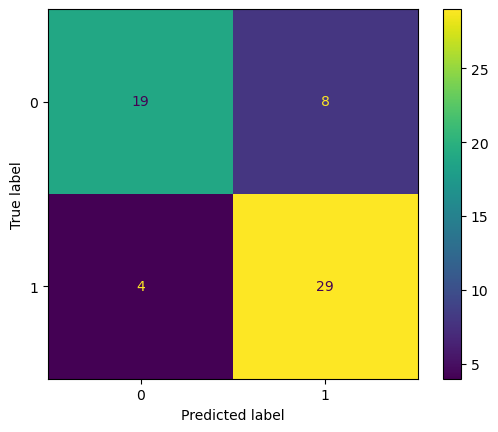

In [47]:
y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

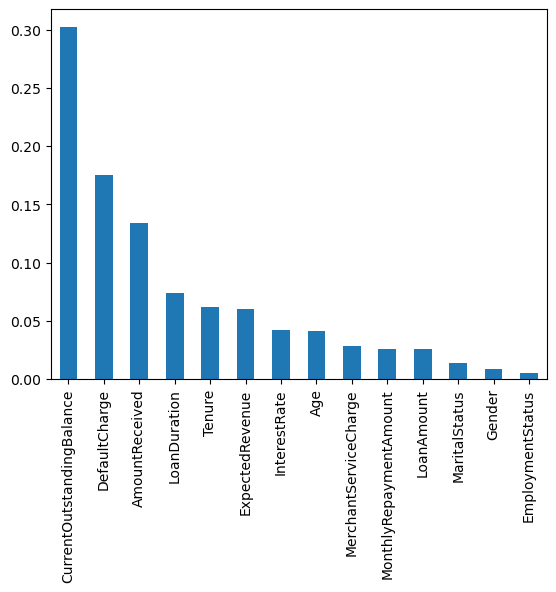

In [48]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar();

In [161]:
# Strategy 4: Algorithmic techniques
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Train a decision tree model with class weighting
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)
y_pred4a = dt.predict(X_test)
print('Evaluation of the decision tree model trained using class weighting:')
print(confusion_matrix(y_test, y_pred4a))
print(classification_report(y_test, y_pred4a))

Evaluation of the decision tree model trained using class weighting:
[[24  7]
 [ 6 23]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.77      0.79      0.78        29

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



***

In [166]:
lr3 = LogisticRegression(class_weight='balanced')
lr3.fit(X_train, y_train)
y_pred3 = lr3.predict(X_test)

# Evaluate the performance of the model on the test set
print('Evaluation of the model trained using cost-sensitive learning:')
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

Evaluation of the model trained using cost-sensitive learning:
[[25  6]
 [ 5 24]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.80      0.83      0.81        29

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



In [158]:
xg =xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_xg = xg.predict(X_test)
print(classification_report(y_test, y_xg))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        31
           1       0.90      0.90      0.90        29

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [49]:
# Save the model 
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_rf, file)

In [54]:
import pandas as pd

# create a dictionary with the test data
test_data = {
    'Gender': [0, 1, 0],
    'Age': [45, 32, 57],
    'MaritalStatus': [1, 0, 1],
    'EmploymentStatus': [0, 2, 1],
    'LoanAmount': [50000, 250000, 1000000],
    'Tenure': [6, 12, 24],
    'MerchantServiceCharge': [1400, 1800, 1200],
    'ExpectedRevenue': [12000, 80000, 150000],
    'LoanDuration': [20, 180, 360],
    'MonthlyRepaymentAmount': [25000, 15000, 50000],
    'AmountReceived': [1500, 7500, 25000],
    'InterestRate': [0.002, 0.03, 0.01],
    'CurrentOutstandingBalance': [34500, 20000, 50000],
    'DefaultCharge': [0.05, 0.1, 0.02],
    #'InflationScore': [14.5, 16.2, 12.8],
    #'Primelending': [12.3, 11.8, 13.2],
    #'Maxlending': [11.7, 10.9, 12.5]
}

test_df = pd.DataFrame(test_data)

import joblib

def makePrediction(test_df):
    model = joblib.load('model.pkl')
    predictions = model.predict(test_df)
    return predictions

makePrediction(test_df)

array([0., 0., 0.])